In [1]:
#%matplotlib notebook

In [2]:
import csv, os, requests, time, pandas as pd, matplotlib.pyplot as plt, numpy as np
from config import *
#plt.style.use('fivethirtyeight')

In [3]:
yelpapi_csv = os.path.join("yelpapidata.csv")
yelp_raw = pd.read_csv(yelpapi_csv)
yelp_raw.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466
3,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012
4,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287


In [4]:
yelp_raw.tail()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph
27846,"Cheyenne, Wyoming",Vietnamese,Xr_UtPKedDyleG_MSHvK-Q,Empire Express,https://s3-media1.fl.yelpcdn.com/bphoto/00xiho...,https://www.yelp.com/biz/empire-express-laport...,False,32,2.5,$,40.657480,-105.160399,3300 W County Rd,Laporte,CO,80535,US,(970) 493-2663
27847,"Cheyenne, Wyoming",Vietnamese,FS9UR3iy80xk4CityY-plw,College Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/0GxxFZ...,https://www.yelp.com/biz/college-cafe-fort-col...,False,23,3.0,$,40.578299,-105.077356,647 S College Ave,Fort Collins,CO,80524,US,(970) 221-2696
27848,"Cheyenne, Wyoming",Turkish,zzeqVazbBK6-drbYWWLR9A,Petra Grill Mediterranean Cuisine,https://s3-media2.fl.yelpcdn.com/bphoto/LtyGPN...,https://www.yelp.com/biz/petra-grill-mediterra...,False,177,4.0,$$,40.574059,-105.100014,1335 W Elizabeth St,Fort Collins,CO,80521,US,(970) 568-8381
27849,"Cheyenne, Wyoming",Turkish,M2a9ML_cYBfjqwR9zxRYLg,Tikka Grill,https://s3-media2.fl.yelpcdn.com/bphoto/Xs6eqt...,https://www.yelp.com/biz/tikka-grill-fort-coll...,False,50,4.5,$,40.574839,-105.099282,1240 W Elizabeth St,Fort Collins,CO,80521,US,(970) 698-6022
27850,"Cheyenne, Wyoming",Caribbean,l6UY1Z__os43azBV0D8c9A,aDeli,https://s3-media1.fl.yelpcdn.com/bphoto/osBbt5...,https://www.yelp.com/biz/adeli-cheyenne?adjust...,False,1,5.0,NaN,41.176210,-104.827320,6101 Yellowstone Rd,Cheyenne,WY,82009,US,(307) 286-8072


In [5]:
yelp_raw.describe()

,review_count,rating,lat,long
count,27851.000000,27851.000000,27850.000000,27850.000000
mean,177.127679,3.967398,38.425217,-92.894844
std,292.762941,0.604082,5.160674,18.784798
min,1.000000,1.000000,21.262370,-158.105524
25%,30.000000,3.500000,35.493787,-104.917115
50%,88.000000,4.000000,39.667450,-89.220339
75%,212.000000,4.500000,41.822154,-78.533204
max,9460.000000,5.000000,58.398782,157.941630


In [6]:
# Pie chart, where the Review count with the  rating



In [7]:
yelp_format_rd1 = yelp_raw.copy()
#yelp_format_rd1["review_count"] = yelp_format_rd1.loc[:, "review_count"].astype(float)
#yelp_format_rd1["rating"] = yelp_format_rd1.loc[:, "rating"].astype(float)
yelp_format_rd1['price_attribute'] = yelp_format_rd1['price'].replace(
    {'$': '1.Affordable', '$$': '2.Moderate', '$$$': '3.Expensive'})
yelp_format_rd1.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801,1.Affordable
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575,1.Affordable
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466,2.Moderate
3,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012,2.Moderate
4,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287,1.Affordable


In [8]:
yelp_format_rd1.columns

Index(['search_city', 'search_cuisine', 'y_id', 'name', 'image_url', 'url',
       'closed', 'review_count', 'rating', 'price', 'lat', 'long', 'add1',
       'city', 'state', 'zip_code', 'country', 'disp_ph', 'price_attribute'],
      dtype='object')

In [9]:
yelp_format_rd1.count()

search_city        27851
search_cuisine     27851
y_id               27851
name               27851
image_url          27532
url                27851
closed             27851
review_count       27851
rating             27851
price              23729
lat                27850
long               27850
add1               27496
city               27851
state              27851
zip_code           27822
country            27851
disp_ph            27251
price_attribute    23729
dtype: int64

In [10]:
yelp_format_rd1.dtypes

search_city         object
search_cuisine      object
y_id                object
name                object
image_url           object
url                 object
closed                bool
review_count         int64
rating             float64
price               object
lat                float64
long               float64
add1                object
city                object
state               object
zip_code            object
country             object
disp_ph             object
price_attribute     object
dtype: object

In [11]:
yelp_gb_cities = yelp_format_rd1.groupby(['search_city'])
yelp_gb_cities.sum().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",False,61218,2506.0,27242.467834,-47077.268325
"Annapolis, Maryland",False,96385,1912.0,19436.953223,-38130.413818
"Atlanta, Georgia",False,287240,3898.0,32554.059412,-81150.804242
"Augusta, Maine",False,15429,1021.0,11696.821371,-18341.337151
"Austin, Texas",False,299061,3792.0,27810.980645,-89635.319822


In [12]:
yelp_gb_cuisines = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisines.sum().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.0,658067,9574.5,93656.108174,-222832.643590
Cajun,0.0,364110,5698.0,56090.625394,-139019.652525
Caribbean,0.0,89119,3081.5,29446.371743,-67662.051855
Chinese,0.0,215002,7071.0,73497.901854,-178476.610595
French,0.0,251601,4517.5,43102.898712,-105380.021478


In [13]:
yelp_gb_price = yelp_format_rd1.groupby(['price'])
yelp_gb_price.sum().head()

,closed,review_count,rating,lat,long
price,,,,,
$,2.0,736368,26193.5,257384.932815,-6.172942e+05
$$,0.0,3755842,62684.0,611843.526283,-1.491098e+06
$$$,0.0,334326,4027.0,38330.086618,-9.183231e+04
$$$$,0.0,30459,460.0,3951.409992,-1.070779e+04


In [14]:
yelp_gb_citiescount = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiescount.count().head()

,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
search_city,,,,,,,,,,,,,,,,,,
"Albany, New York",638,638,638,628,638,638,638,638,531,638,638,632,638,638,638,638,622,531
"Annapolis, Maryland",498,498,498,496,498,498,498,498,437,498,498,490,498,498,498,498,493,437
"Atlanta, Georgia",962,962,962,960,962,962,962,962,851,962,962,960,962,962,962,962,947,851
"Augusta, Maine",264,264,264,253,264,264,264,264,210,264,264,264,264,264,264,264,261,210
"Austin, Texas",917,917,917,915,917,917,917,917,768,917,917,910,917,917,916,917,890,768


In [15]:
yelp_gb_cuisinescount = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinescount.count().head()

,search_city,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
search_cuisine,,,,,,,,,,,,,,,,,,
American,2396,2396,2396,2368,2396,2396,2396,2396,2039,2396,2396,2392,2396,2396,2396,2396,2346,2039
Cajun,1491,1491,1491,1479,1491,1491,1491,1491,1281,1491,1491,1470,1491,1491,1491,1491,1451,1281
Caribbean,764,764,764,738,764,764,764,764,532,764,764,724,764,764,761,764,735,532
Chinese,1914,1914,1914,1887,1914,1914,1914,1914,1716,1914,1914,1912,1914,1914,1913,1914,1883,1716
French,1118,1118,1118,1111,1118,1118,1118,1118,1018,1118,1118,1111,1118,1118,1117,1118,1097,1018


In [20]:
yelp_gb_citiesavg = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiesavg.mean().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",0.0,95.952978,3.927900,42.699793,-73.788822
"Annapolis, Maryland",0.0,193.544177,3.839357,39.030027,-76.567096
"Atlanta, Georgia",0.0,298.586279,4.051975,33.839979,-84.356345
"Augusta, Maine",0.0,58.443182,3.867424,44.306142,-69.474762
"Austin, Texas",0.0,326.129771,4.135224,30.328223,-97.748440


In [21]:
yelp_gb_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinesavg.mean().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.0,274.652337,3.996035,39.088526,-93.001938
Cajun,0.0,244.205231,3.821596,37.619467,-93.239204
Caribbean,0.0,116.647906,4.033377,38.542371,-88.562895
Chinese,0.0,112.331243,3.694357,38.400158,-93.247968
French,0.0,225.045617,4.040698,38.553577,-94.257622


In [22]:
yelp_gb2_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb2_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    138.660000  4.090000  42.687656   
                 Cajun              0.0    134.363636  3.681818  42.712528   
                 Caribbean          0.0     21.583333  3.625000  42.700434   
                 Chinese            0.0     85.920000  3.570000  42.686607   
                 French             0.0     71.071429  3.964286  42.704651   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.781079  
                 Cajun          -73.783241  
                 Caribbean      -73.791653  
                 Chinese        -73.793954  
                 French         -73.786837

In [23]:
yelp_gb2_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb2_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        138.66    4.09  42.687656   
               Annapolis, Maryland     0.0        281.00    3.99  38.976601   
               Atlanta, Georgia        0.0        708.70    4.20  33.799748   
               Augusta, Maine          0.0         47.28    4.00  44.354949   
               Austin, Texas           0.0        657.44    4.24  30.331474   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.781079  
               Annapolis, Maryland -76.507178  
               Atlanta, Georgia    -84.392725  
               Augusta, Maine      -69.726458  
               Austin, Texas       -97.749226

In [24]:
yelp_gb3_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb3_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    138.660000  4.090000  42.687656   
                 Cajun              0.0    134.363636  3.681818  42.712528   
                 Caribbean          0.0     21.583333  3.625000  42.700434   
                 Chinese            0.0     85.920000  3.570000  42.686607   
                 French             0.0     71.071429  3.964286  42.704651   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.781079  
                 Cajun          -73.783241  
                 Caribbean      -73.791653  
                 Chinese        -73.793954  
                 French         -73.786837

In [25]:
yelp_gb3_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb3_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        138.66    4.09  42.687656   
               Annapolis, Maryland     0.0        281.00    3.99  38.976601   
               Atlanta, Georgia        0.0        708.70    4.20  33.799748   
               Augusta, Maine          0.0         47.28    4.00  44.354949   
               Austin, Texas           0.0        657.44    4.24  30.331474   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.781079  
               Annapolis, Maryland -76.507178  
               Atlanta, Georgia    -84.392725  
               Augusta, Maine      -69.726458  
               Austin, Texas       -97.749226

In [26]:
#This is where we are going to start charting, I have provided some exmaples for you. 

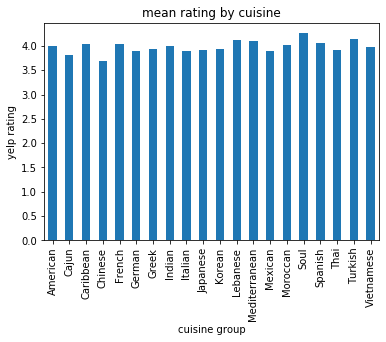

<Figure size 432x288 with 0 Axes>

In [27]:
chartme1 = yelp_gb_cuisinesavg['rating'].mean()
cuisine_chart = chartme1.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("cuisine group")
cuisine_chart.set_ylabel("yelp rating")

plt.show()
plt.tight_layout()

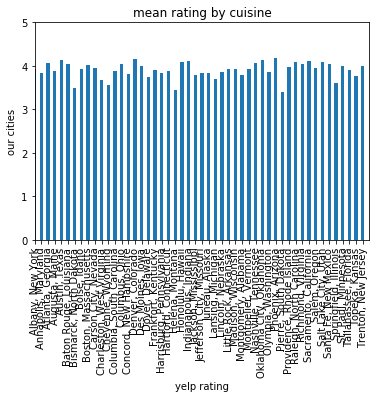

<Figure size 432x288 with 0 Axes>

In [38]:
chartme2 = yelp_gb_citiesavg['rating'].mean()
cuisine_chart = chartme2.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("yelp rating")
cuisine_chart.set_ylabel('our cities')

plt.ylim((0,5))
plt.xlim((0,50))
plt.show()
plt.tight_layout()


In [ ]:
# will work with the data formating in the pandas data frame
# work with the data visualization in the matplotlib
